Imports

In [1]:
# ! pip install numpy 
# ! pip install qiskit
# ! pip install matplotlib

In [2]:
from qiskit import QuantumCircuit, Aer ,BasicAer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np

Compsing gates for the Phase Oracle and the Diffuser

For the marked state
|m> = (|00> + |01>)/sqrt(2)

Or when simplified to give
|m> = |0>(|0> + |1>)/sqrt(2)

Hence for the oracle, we need only add a phase wehn the first qubit is in state |0>

In [3]:
def phase_oracle(name = 'Of'):
    qc = QuantumCircuit(3, name=name)
    
    qc.x(1)
    qc.cx(1,2)
    qc.x(1)
    
    return qc

In [4]:
def diffuser( name='V'):
    qc = QuantumCircuit(3, name=name)
    
    for qb in range(2): #first layer of Hadamards in diffuser
        qc.h(qb)
   
    for i in range(2):
        qc.x(i)
        
    qc.ccx(0,1,2)
    
    for i in range(2):
        qc.x(i)
    
    for qb in range(2): #second layer of Hadamards in diffuser
        qc.h(qb)
        
    return qc

Let the size of the problem be n = 2, 
Then total size of quantum register will be n+1, accounting for the ancilla register

In [5]:
n = 2

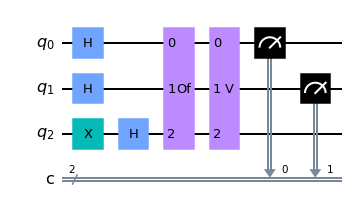

In [6]:
gr = QuantumCircuit(n+1, 2)

m = 2 # Number of solutions
r = int(np.floor(np.pi/4*np.sqrt(2**(n)/m))) # Determine r
    
gr.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr.x(n)
gr.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr.append(phase_oracle(), range(n+1))
    gr.append(diffuser(), range(n+1))
      
gr.measure(0, 0)
gr.measure(1, 1)    # step 3: measure all qubits
    
gr.draw('mpl')

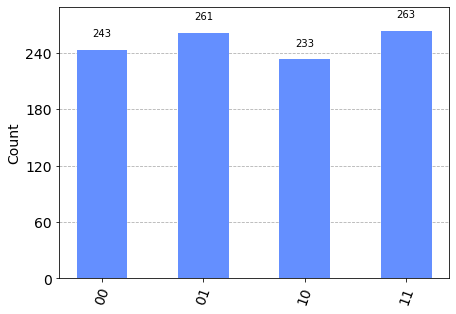

In [7]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr, backend=simulator, shots=1000)
counts = job.result().get_counts()

plot_histogram(counts)

# Probability og finding the state p(|m>)  = p(00)+ p(10)


Plotting probability of successfully measuring marked state against Grover iterations

In [8]:
n = 2

prob_marked = []


# Returns probability of success
def probability(counts):
    
    key_sol1 = '00'
    key_sol2 = '10'
    
    val_sol = counts[key_sol1] +  counts[key_sol2]
    
    val_total = sum(counts.values())

    prob_of_success = val_sol/val_total

    return prob_of_success

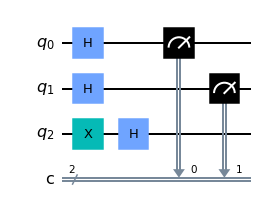

In [9]:
gr0 = QuantumCircuit(n+1, n)

r = 0
    
gr0.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr0.x(n)
gr0.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr1.append(phase_oracle(n+1), range(n+1))
    gr1.append(diffuser(n+1), range(n+1))
        
gr0.measure(range(n), range(n))    # step 3: measure all qubits
    
gr0.draw('mpl')

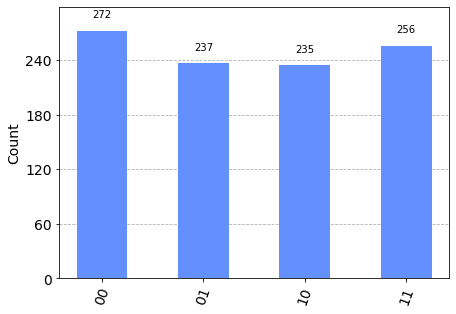

In [10]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr0, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

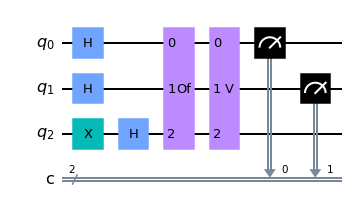

In [11]:
gr1 = QuantumCircuit(n+1, n)

r = 1
    
gr1.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr1.x(n)
gr1.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr1.append(phase_oracle(), range(n+1))
    gr1.append(diffuser(), range(n+1))
        
gr1.measure(range(n), range(n))    # step 3: measure all qubits
    
gr1.draw('mpl')

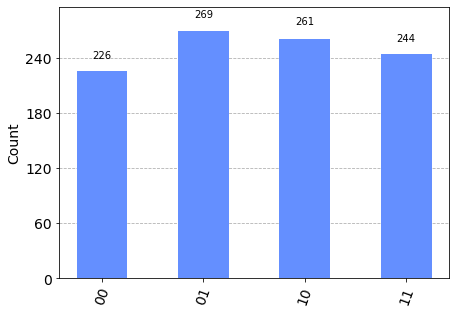

In [12]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr1, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

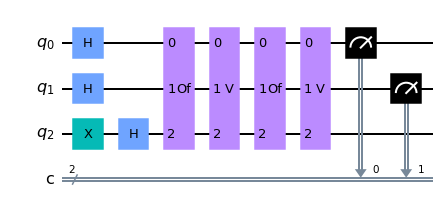

In [13]:
gr2 = QuantumCircuit(n+1, n)

r = 2
    
gr2.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr2.x(n)
gr2.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr2.append(phase_oracle(), range(n+1))
    gr2.append(diffuser(), range(n+1))
        
gr2.measure(range(n), range(n))    # step 3: measure all qubits
    
gr2.draw('mpl')

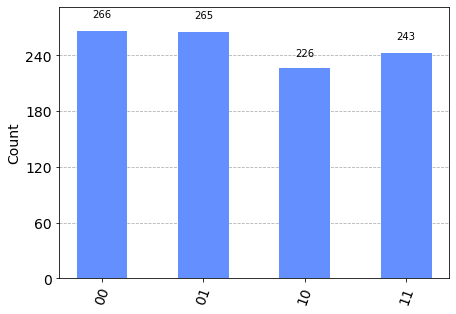

In [14]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr2, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

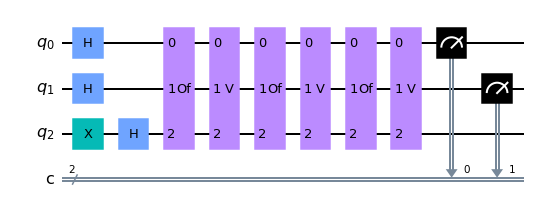

In [15]:
gr3 = QuantumCircuit(n+1, n)

r = 3
    
gr3.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr3.x(n)
gr3.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr3.append(phase_oracle(), range(n+1))
    gr3.append(diffuser(), range(n+1))
        
gr3.measure(range(n), range(n))    # step 3: measure all qubits
    
gr3.draw('mpl')

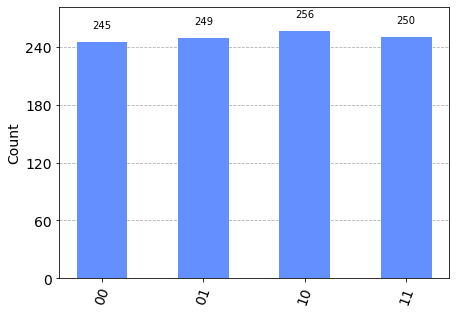

In [16]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr3, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

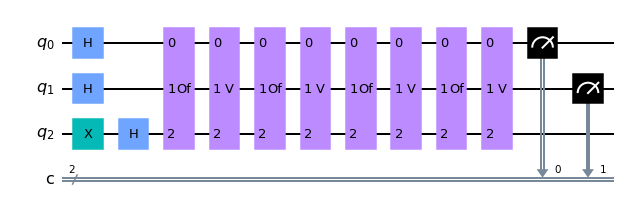

In [17]:
gr4 = QuantumCircuit(n+1, n)

r = 4
    
gr4.h(range(n))    # step 1: apply Hadamard gates on all working qubits

# put ancilla in state |->
gr4.x(n)
gr4.h(n)
    
# step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr4.append(phase_oracle(), range(n+1))
    gr4.append(diffuser(), range(n+1))
        
gr4.measure(range(n), range(n))    # step 3: measure all qubits
    
gr4.draw('mpl')

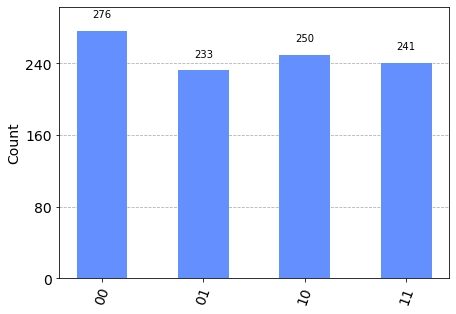

In [18]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(gr4, backend=simulator, shots=1000)
counts = job.result().get_counts()

prob_marked.append(probability(counts))

plot_histogram(counts)

Plotting the probability of success againt r

Text(0, 0.5, 'Probability of Marked State')

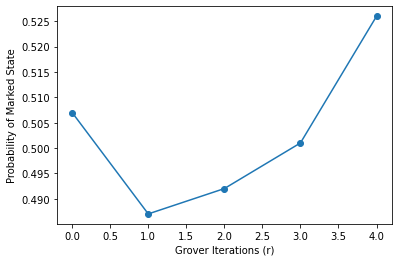

In [19]:
r = [0,1,2,3,4]

plt.plot(r, prob_marked, 'o-')
plt.xlabel("Grover Iterations (r)")
plt.ylabel("Probability of Marked State")

The results above show that the probability fluctuates about 0.5 which is also the initial amplitude for the state |m>. This exmaple illustrates one draw back of the Grover search.

Suggestion: Take a look at the geometric argument and how they evolve but never reach p(m)~1. 